In [1]:
# ============================================================
# 🧩 SETUP BLOCK
# Install dependencies (run once per session)
# ============================================================

!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00


In [2]:
# ============================================================
# 📚 IMPORT LIBRARIES
# ============================================================

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

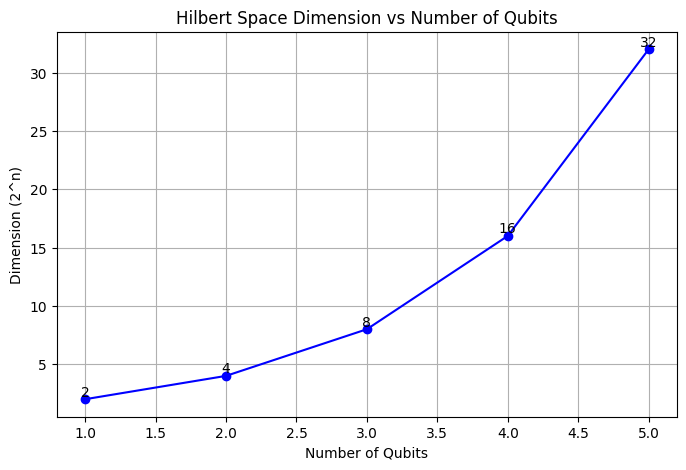

In [3]:
# ============================================================
# ⚛️ PART 1: Hilbert Space Dimension vs Number of Qubits
# ============================================================

# Define number of qubits and corresponding Hilbert space dimensions
qubits = list(range(1, 6))
dimensions = [2**n for n in qubits]

# Plot growth of Hilbert space
plt.figure(figsize=(8, 5))
plt.plot(qubits, dimensions, marker='o', color='blue')

# Add value labels on points
for i, dim in zip(qubits, dimensions):
    plt.text(i, dim, f"{dim}", ha='center', va='bottom')

# Titles and labels
plt.title("Hilbert Space Dimension vs Number of Qubits")
plt.xlabel("Number of Qubits")
plt.ylabel("Dimension (2^n)")
plt.grid(True)
plt.show()

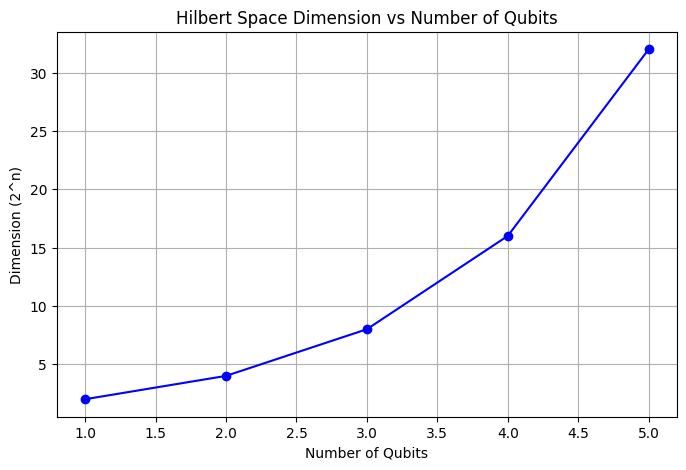

----------------------------------------------------------------------
Qubits:      1     2     3     4     5     
Dimensions:  2     4     8     16    32    
----------------------------------------------------------------------


In [17]:
# ============================================================
# 🌌 PART 1: Hilbert Space Dimension vs Number of Qubits
# ============================================================

import matplotlib.pyplot as plt

# Define qubits and Hilbert space dimensions
qubits = list(range(1, 6))
dimensions = [2**n for n in qubits]

# --- Plot the relationship ---
plt.figure(figsize=(8, 5))
plt.plot(qubits, dimensions, marker='o', color='blue')
plt.title("Hilbert Space Dimension vs Number of Qubits")
plt.xlabel("Number of Qubits")
plt.ylabel("Dimension (2^n)")
plt.grid(True)
plt.show()

# --- Display as formatted table ---
print("-" * 70)
print("Qubits:      ", end="")
for q in qubits:
    print(f"{q:<6}", end="")
print("\nDimensions:  ", end="")
for d in dimensions:
    print(f"{d:<6}", end="")
print("\n" + "-" * 70)


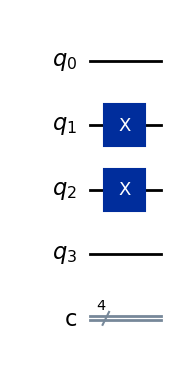

In [4]:
# ============================================================
# ⚙️ PART 2: Simulating Qutrits using Qubits
# ============================================================

# Encoding rule:
# |0> => |00>
# |1> => |01>
# |2> => |10>

# Create circuit: 4 qubits (2 per qutrit), 4 classical bits for measurement
qc = QuantumCircuit(4, 4, name="Qutrit Simulator")

# Initialize Qutrit A (qubits 0,1) to |1>  -> |01>
qc.x(1)

# Initialize Qutrit B (qubits 2,3) to |2>  -> |10>
qc.x(2)

# Visualize circuit (matplotlib)
qc.draw('mpl')

Counts: {'0110': 1024}


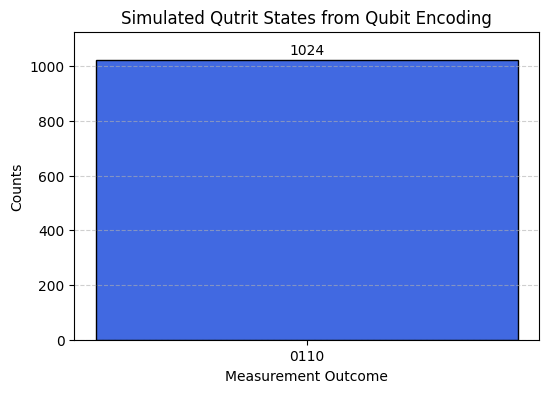

In [15]:
# ============================================================
# 🧮 PART 3: Simulation + Normal-Sized Histogram Bar
# ============================================================

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# --- Create Quantum Circuit ---
qc = QuantumCircuit(4, 4)
qc.x(1)  # Qutrit A = |01>
qc.x(2)  # Qutrit B = |10>
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# --- Simulate ---
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)

print("Counts:", counts)

# --- Manual Histogram with Normal Bar Size ---
if counts:
    outcomes = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(6, 4))
    plt.bar(outcomes, values, color='royalblue', width=0.4, edgecolor='black')
    plt.title("Simulated Qutrit States from Qubit Encoding")
    plt.xlabel("Measurement Outcome")
    plt.ylabel("Counts")

    # ✅ Control bar height display
    plt.ylim(0, max(values) * 1.1)  # adds 10% headroom above bar

    # Add count label above the bar
    for i, v in enumerate(values):
        plt.text(i, v + max(values)*0.02, str(v), ha='center', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
else:
    print("⚠️ No counts recorded. Please rerun the cell.")


In [16]:
# ============================================================
# 🧩 PART 4: Decode Qubit Measurement into Qutrit States
# ============================================================

# Assuming 'counts' comes from the Part 3 result

print("\n🔍 Decoding Qutrit States from Qubit Measurements:\n")

if counts:
    for outcome, count in counts.items():
        # Qiskit returns bitstrings in reverse order (rightmost = first qubit)
        bits = outcome[::-1]  # reverse the string

        # Split into two qutrits (each 2 bits)
        qutrit_A = bits[0:2]  # first two bits
        qutrit_B = bits[2:4]  # last two bits

        # Map binary pairs to qutrit levels
        def decode_qutrit(pair):
            mapping = {"00": "|0⟩", "01": "|1⟩", "10": "|2⟩", "11": "(invalid)"}
            return mapping.get(pair, "(invalid)")

        print(f"Outcome: {outcome}  →  "
              f"Qutrit A: {decode_qutrit(qutrit_A)},  "
              f"Qutrit B: {decode_qutrit(qutrit_B)},  "
              f"Count: {count}")

else:
    print("⚠️ No measurement results found. Please run Part 3 first.")



🔍 Decoding Qutrit States from Qubit Measurements:

Outcome: 0110  →  Qutrit A: |1⟩,  Qutrit B: |2⟩,  Count: 1024
